__Change current directory__

In [1]:
import os
os.chdir('..')

### Import libraries and modules

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer
import pandas as pd
import seaborn as sns
from src import detector_descriptor as dd
from src import data as dt
from src import util
from src import experiments as ex
from src import keypoint_processing as kpp
import cv2
import yaml
# plt.style.use('fast')


__Load configuration__

In [3]:
with open(os.path.join('./', 'config.yml'), 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
    cfg = cfg['default']

__Load image set__

In [4]:
dataset_path = cfg['path']['dataset']
dataset = cfg['current_dataset']
# labels = dt.load_labels(os.path.join(dataset_path, dataset), '.txt')
pckl_path = cfg['path']['pckl']
# pckl_name = ''.join([dataset, '_label.pckl'])
data_path = os.path.join(pckl_path, ''.join([dataset, '.pckl']))

#### Image set to variance

In [5]:
image_set_variance = {
    'bark': 'zoom and rotation', 
    'boat': 'zoom and rotation',
    'leuven': 'illumination',
    'bikes': 'blur', 
    'trees': 'scale',
    'wall': 'viewpoint',
    'graf': 'perspective',
    'ubc': 'jpeg-compression'
}



In [6]:
colors = ['olive', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'indigo', 'black']

##### Show all images from an image set

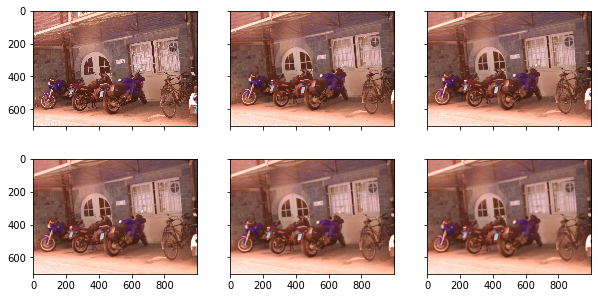

In [7]:
# all_detectors = dd.get_all_detectors()
# print(list(all_detectors.keys()))
image_set = util.get_image_set(data_path, 'bikes')
util.show_image_set(image_set)

In [8]:
plt.rcParams["font.family"] = "Times New Roman"

In [9]:
val = kpp.get_kp(image, 'BRISK')
val = kpp.cvkp2np(val)
fig, ax = plt.subplots(1,1, figsize=(12,9), dpi=100)

x = val[:,0]
y = val[:,1]
ax.imshow(image)
ax.scatter(x,y, c='r', s=2)
plt.show()
# print(len(val))

NameError: name 'image' is not defined

In [ ]:
image_set_ = util.get_image_set(data_path, 'ubc')
image_num = 6
image = image_set_['{0}_img{1}'.format('ubc', image_num)]
all_kp = {}
row = 2
col = 4
fig, axs = plt.subplots(row, col, figsize=(12,5), sharex=True, sharey=True)
for detector_name in dd.all_detectors:
    all_kp[detector_name] = kpp.get_kp(image, detector_name)
kpnp = kpp.cvkp2np_all(all_kp)
i = 0
for detector_name in kpnp.keys():
    x = kpnp[detector_name][:,0]
    y = kpnp[detector_name][:,1]
    axs[i // col, i % col].imshow(image)
    axs[i // col, i % col].scatter(x,y, c='r', s=2)
    # Hide grid lines
#     axs[i // 3, i % 3].grid(False)
    axs[i // col, i % col].axis('off')

    # Hide axes ticks
    axs[i // col, i % col].set_xticks([])
    axs[i // col, i % col].set_yticks([])
    axs[i // col, i % col].set_title(f'{detector_name}: {kpnp[detector_name].shape[0]} keypoints')
#     axs[i // 3, i % 3].set_zticks([])
    i += 1
fig.subplots_adjust(wspace = 0.02, hspace = 0.02)


# plt.axis('off')
# plt.grid(b=None)
plt.show()

### First experiment
Visualize total number of keypoints vs execution time for corresponding detectors

In [ ]:
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
# 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
# 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
#'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
plt.style.use('seaborn-pastel')

In [ ]:
image_set_ = util.get_image_set(data_path, 'bikes')
image_num = 1
image = image_set_['{0}_img{1}'.format('bikes', image_num)]
fig = plt.figure()
ax = fig.add_subplot(111)
ex.exp_det_kpet_plt(image, ax)
ax.legend(bbox_to_anchor=(1.15, 1.0), loc="upper left")
plt.grid()
plt.show()

In [ ]:
image_set_name = 'graf'
image_set_ = util.get_image_set(data_path, image_set_name)
image_num = 1
image = image_set_['{0}_img{1}'.format(image_set_name, image_num)]
fig = plt.figure()
ax = fig.add_subplot(111)
ex.exp_det_kpet_plt(image, ax)
ax.legend(bbox_to_anchor=(1.25, 1.0), loc="upper left")
plt.grid()
plt.show()

Number of total keypoints and execution time for each detector type for an image

In [10]:
image_set_name = 'bikes'
image_set_ = util.get_image_set(data_path, image_set_name)
image_num = 3
image = image_set_['{0}_img{1}'.format(image_set_name, image_num)]
df = ex.experiment_1_df(image)
# df.style. \
#     apply(util.highlight_max, subset=['Execution Time', 'Number of Keypoints']). \
#     apply(util.highlight_min, subset=['Execution Time', 'Number of Keypoints'])


In [11]:
df

,Detector,Execution Time,Number of Keypoints
0,AGAST,0.008704,2220
1,KAZE,0.493164,1252
2,AKAZE,0.104203,1161
3,FAST,0.001911,2045
4,BRISK,0.167646,926
5,ORB,0.428191,3823
6,HarrisLaplace,0.948358,500
7,StarDetector,0.026316,261


#### Visualize average total number of keypoints vs average execution time for corresponding detectors for a certain image set

In [12]:
image_set_arr = ['bikes', 'leuven', 'graf', 'boat', 'bark', 'ubc']
plot_data_arr = []

for image_set_name in image_set_arr: 
    image_set = util.get_image_set(data_path, image_set_name)
    avg_execution_time, avg_total_keypoints = kpp.get_det_avg_numkp_et(image_set)
    plot_data = {}
    for name in avg_execution_time.keys():
        plot_data[name] = [avg_execution_time[name], avg_total_keypoints[name]]
    plot_data_arr.append(plot_data)

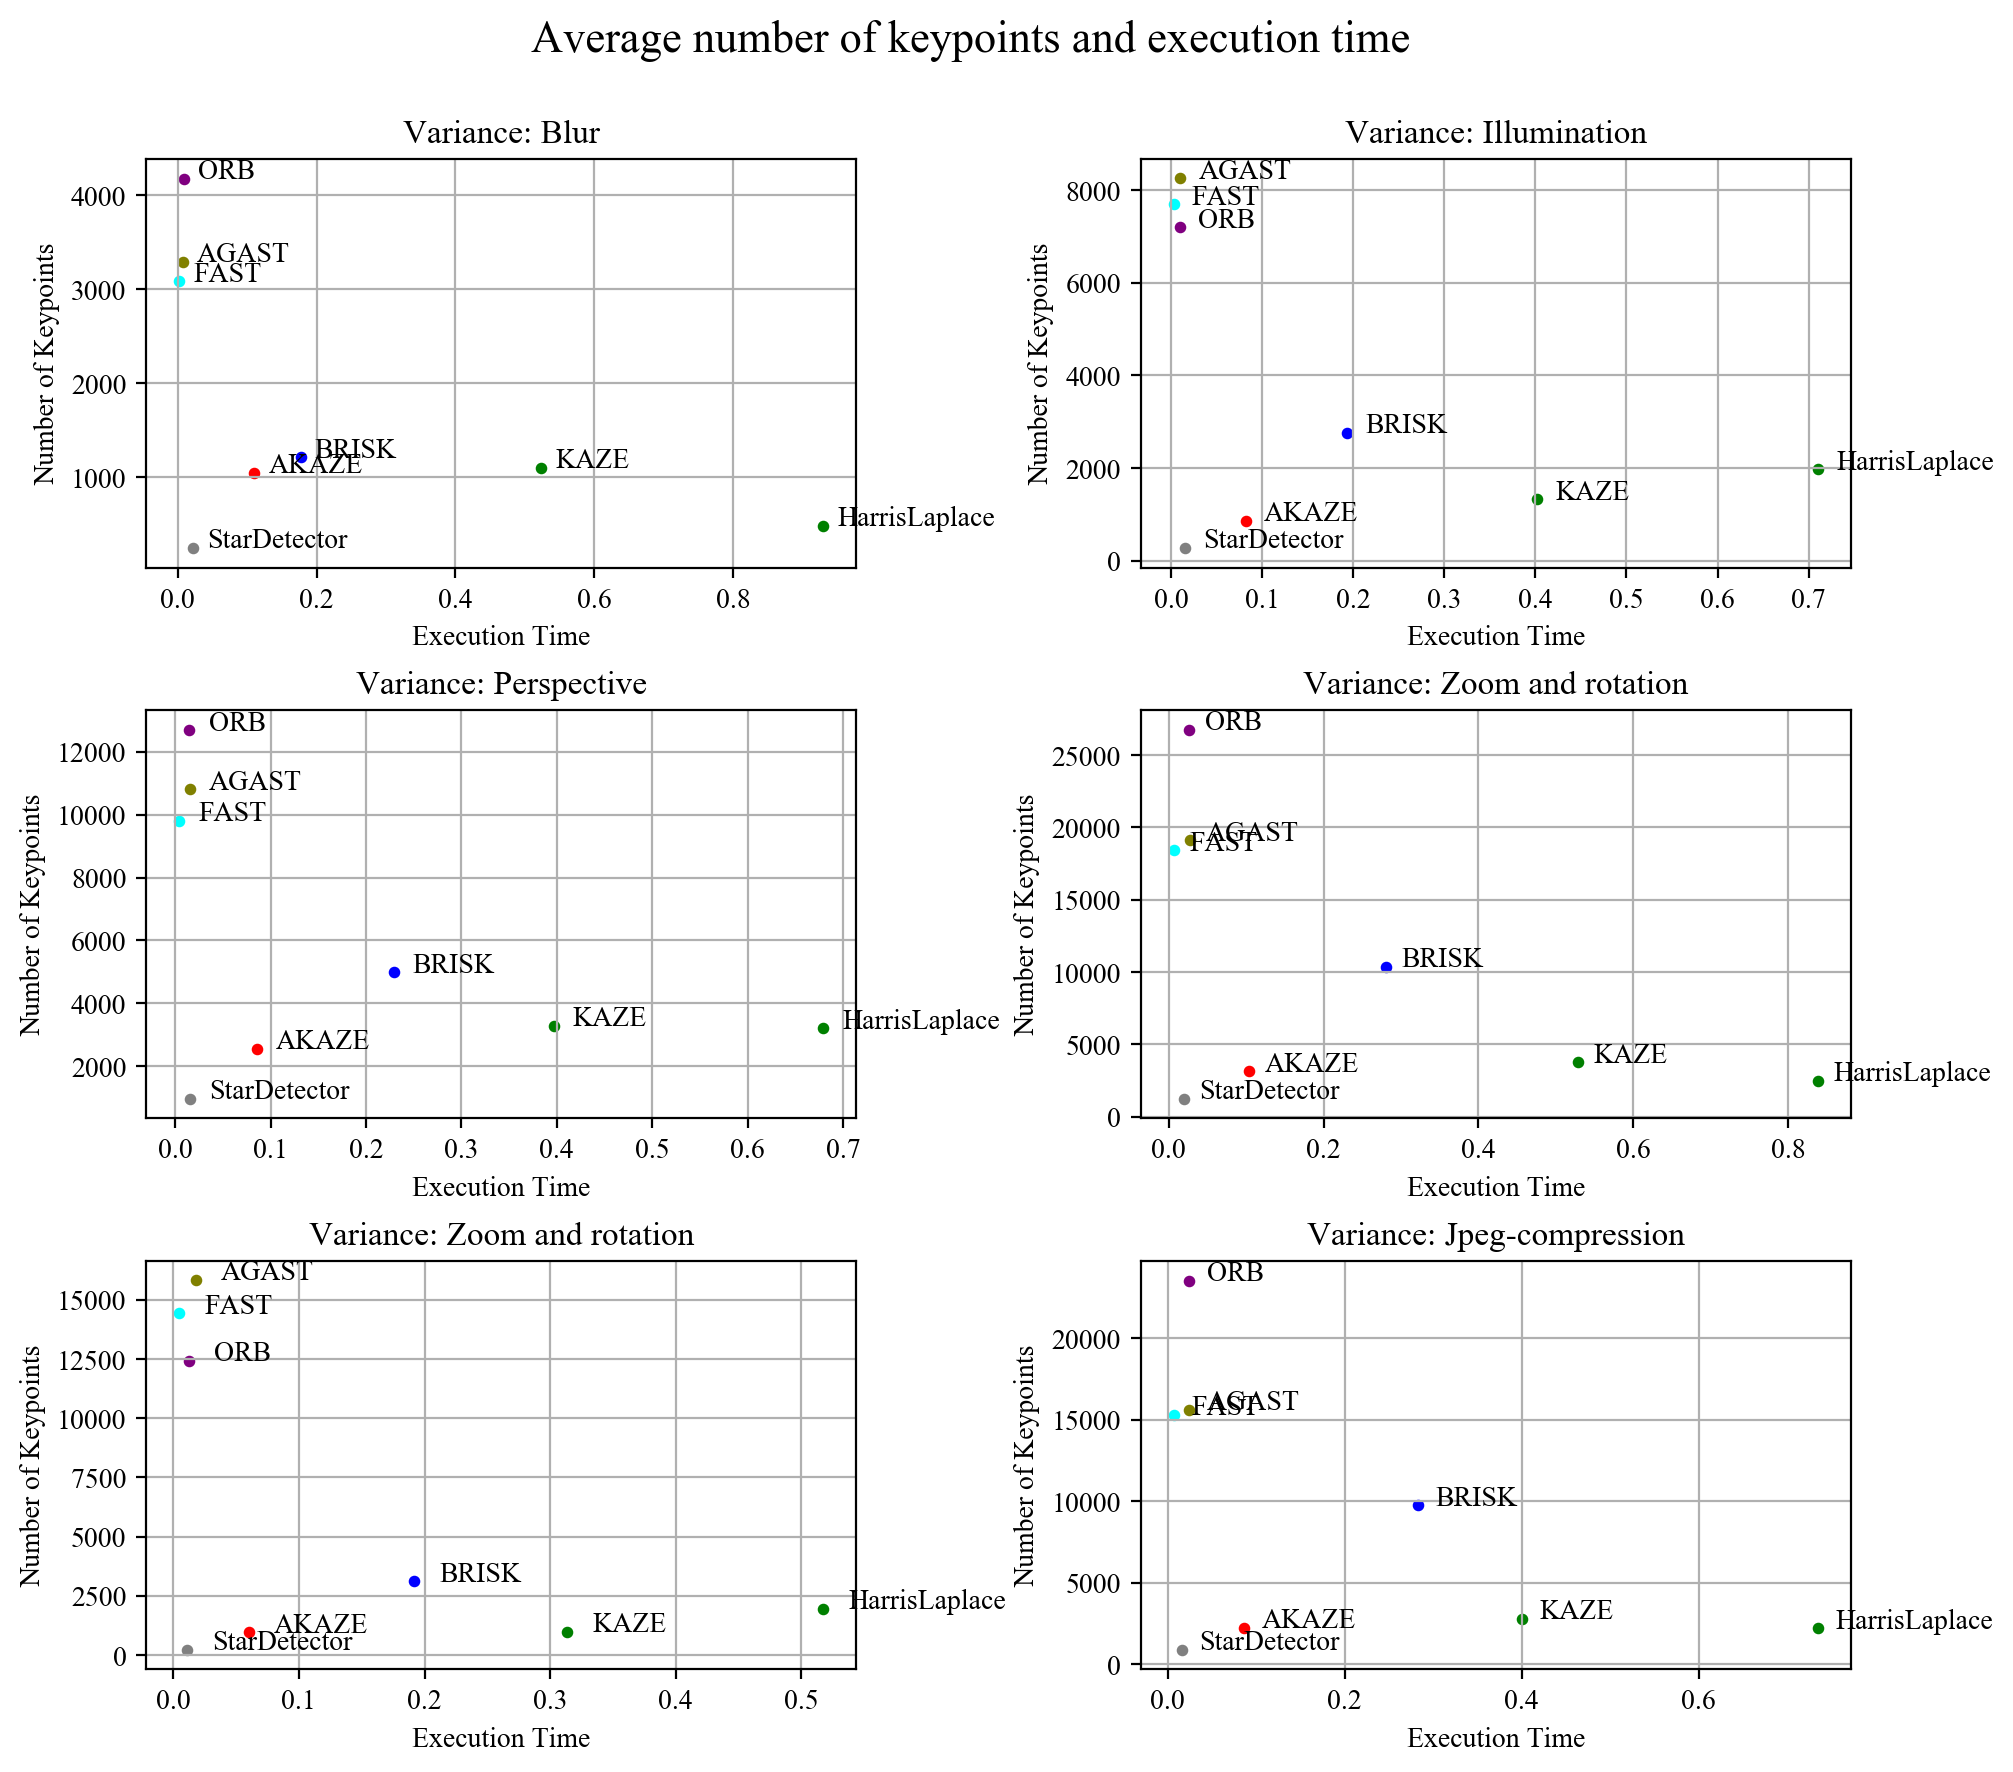

In [13]:
# sns.set_style("darkgrid")
# plt.style.use('seaborn')
# plt.style.use('seaborn-pastel')
row = 3
col = 2
fig, axs = plt.subplots(row, col, figsize=(11, 10), dpi=200)
colors = ['olive', 'green', 'red', 'cyan', 'blue', 'purple', 'green', 'grey', 'orange', 'brown']

plot_data_index = 0
for plot_data in plot_data_arr:
    color_index = 0
    for key, values in plot_data.items():
        x, y = values
        axs[plot_data_index//col, plot_data_index%col].scatter(x, y, c=colors[color_index], s=10, label=key)
        axs[plot_data_index//col, plot_data_index%col].annotate(key, xy=(x+0.02, y), textcoords='data')
        color_index += 1
    axs[plot_data_index//col, plot_data_index%col].grid(True)
    # axs[1].legend(loc="upper center",bbox_to_anchor=(0.5, -0.15), ncol=3)
    axs[plot_data_index//col, plot_data_index%col].set_xlabel("Execution Time")
    axs[plot_data_index//col, plot_data_index%col].set_ylabel("Number of Keypoints")
    variance = image_set_variance[image_set_arr[plot_data_index]]
    image_set_name = image_set_arr[plot_data_index]
    axs[plot_data_index//col, plot_data_index%col].set_title(f"Variance: {variance.capitalize()}")
    plot_data_index += 1
fig.subplots_adjust(wspace = 0.4, hspace=0.35)
plt.suptitle('Average number of keypoints and execution time', fontsize = 16, y = 0.95)
# plt.tight_layout()
plt.show()

| Detector | Execution Time |
| --- | --- |
| FAST | 0.002 +- 0.0004 |
| AGAST | 0.007 +- 0.0005 |
| ORB | 0.01 +- 0.002 |
| StarDetector | 0.02 +- 0.005 |
| AKAZE | 0.07 +- 0.025 |
| BRISK | 0.2 +- 0.05 |
| KAZE | 0.33 +- 0.07 |
| HarrisLaplace | 0.68 +- 0.19 |

Based on number of keypoints detected, we made three groups: StarDetector, HarrisLaplace; AKAZE, BRISK, KAZE; AGAST, FAST, ORB.
Depending on the scene one detector might have more or less points than other detector within that group but htey are less likely to detecto more or less points than the detectors in other groups.

#### Gradual blurring
The runtime and number of keypoints detected as the image is progressively blurred
##### Observations:
- Harris Laplace has the highest runtime 0.85 seconds. KAZE has a runtime of ~0.45s and the rest falls wihtin a very close range ~0.001 to ~0.03 
- All the detectors trends downward while only GFTT detects more keypoints for the 'bikes' image set.

In [14]:
image_set_arr = ['leuven', 'bikes', 'ubc']
plot_data_arr = []

for image_set_name in image_set_arr: 
    image_set = util.get_image_set(data_path, image_set_name)  
    plot_data = {}
    for detector_name in dd.all_detectors:    
#     if detector_name in ['FAST', 'AGAST']:
#         continue
#         execution_time, total_keypoints 
        plot_data[detector_name]= kpp.get_det_kp_et(image_set, detector_name)
    plot_data_arr.append(plot_data)
print(len(plot_data_arr))

3


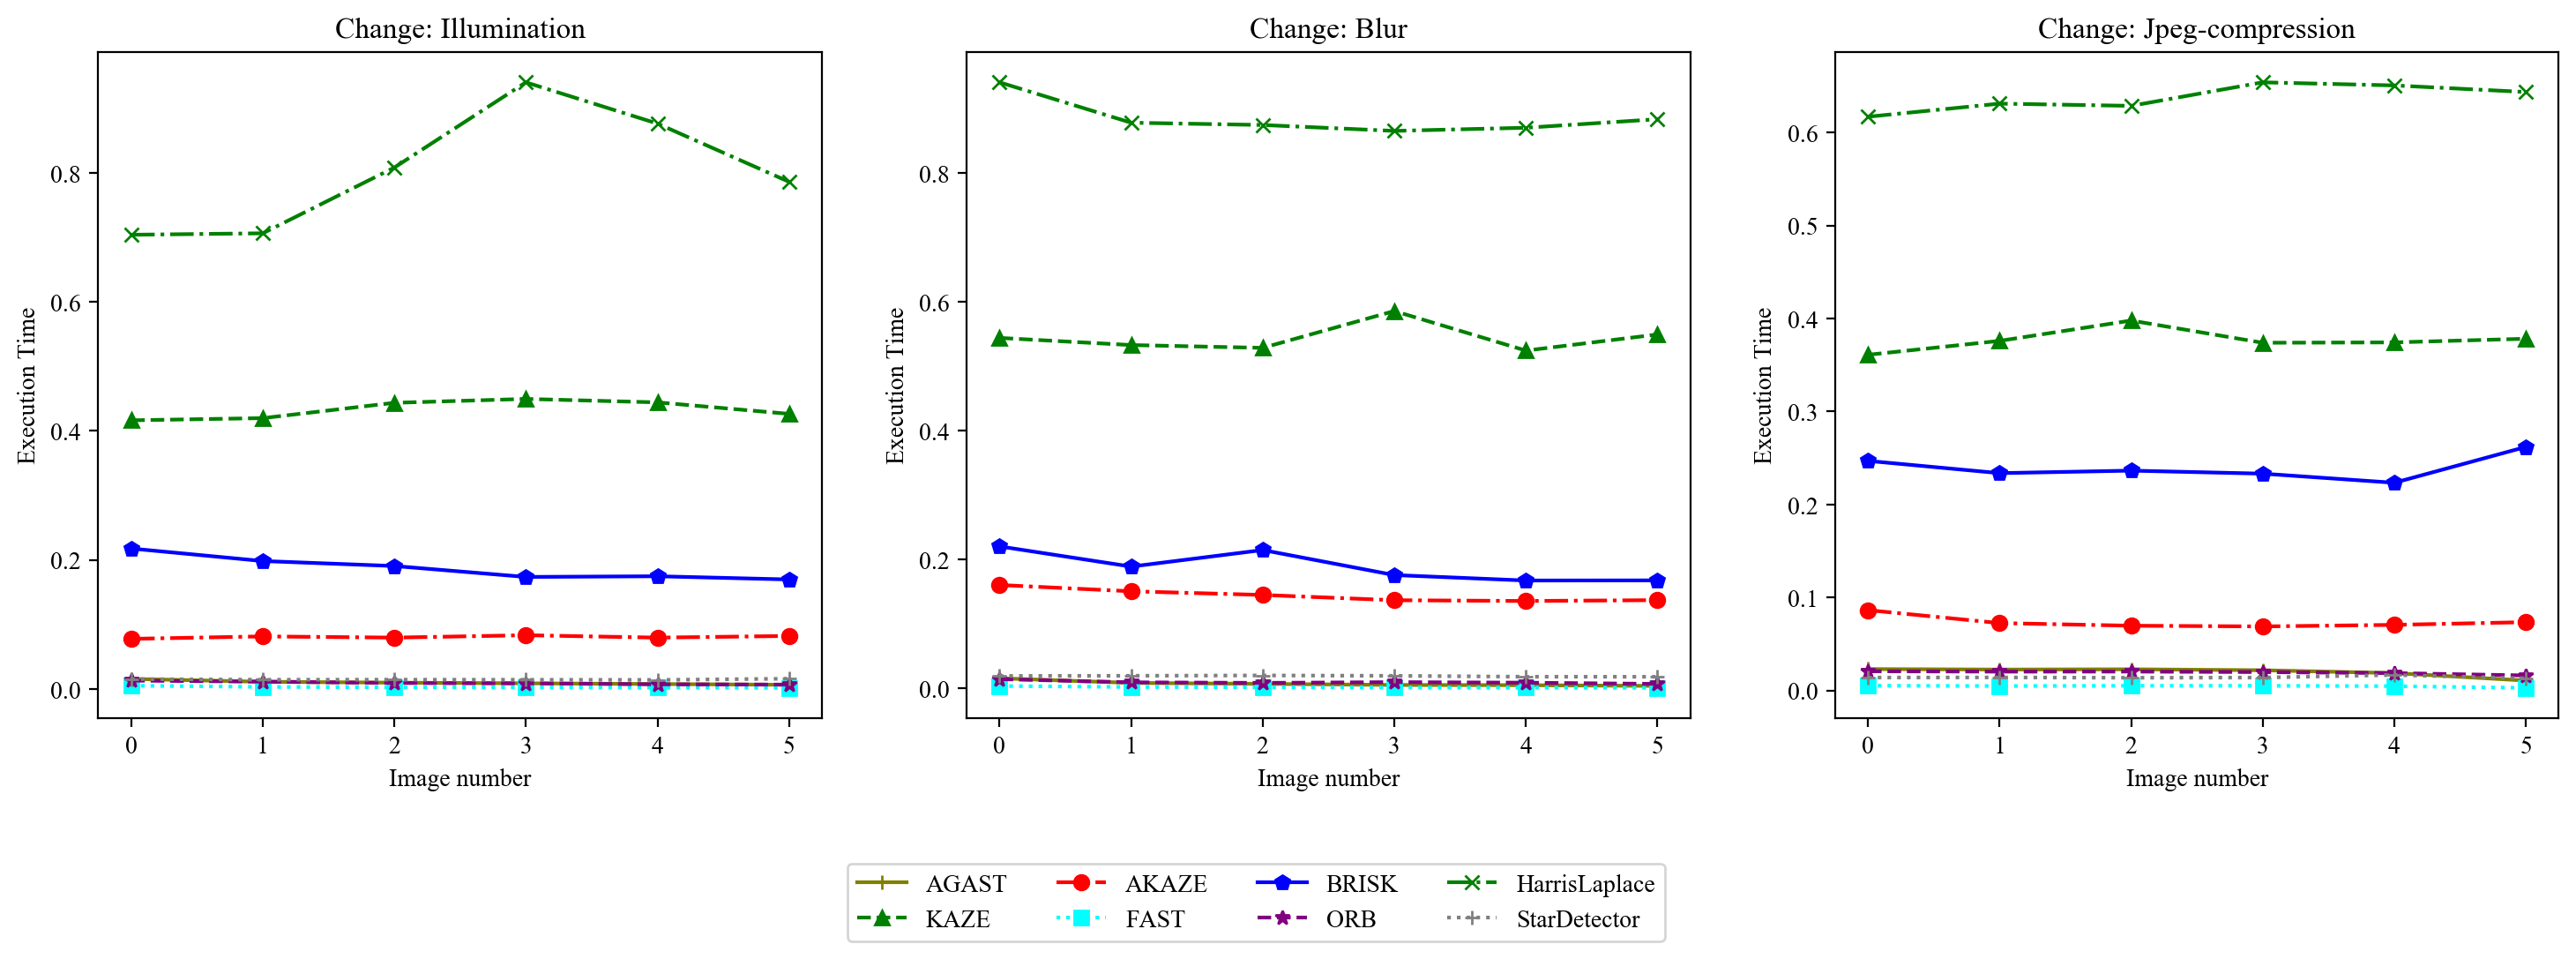

In [15]:
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 
# 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
# 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
#'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
# plt.style.use()
linestyle_ = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
markers = ['+', '^', 'o', 's', 'p', '*', 'x', '+', '^', 'o', 's', 'p', '*', 'x']
plt.rcParams["font.family"] = "Times New Roman"
fig1, axs1 = plt.subplots(1, 3, figsize=(18,5), dpi=200)
# fig2, axs2 = plt.subplots(1, 3, figsize=(18,8), dpi=300)
axs_col = 0
for plot_data in plot_data_arr:
    i = 0
    for detector_name in dd.all_detectors: 
        execution_time, total_keypoints = plot_data[detector_name]
        axs1[axs_col].plot(list(execution_time.keys()), list(execution_time.values()), linestyle=linestyle_[i], 
                           linewidth=1.5, marker=markers[i], c=colors[i], label=detector_name)
#         axs2[axs_col].plot(list(total_keypoints.keys()), [len(value) for value in total_keypoints.values()], 
#                              c=colors[i], label=detector_name)
        i += 1
#     axs[0, axs_col].legend(loc="upper center",bbox_to_anchor=(0.5, -0.15), ncol=3)
    variance = image_set_variance[image_set_arr[axs_col]]    
    axs1[axs_col].set_title(f'Change: {variance.capitalize()}')
    axs1[axs_col].set_xlabel(f'Image number')
    axs1[axs_col].set_ylabel("Execution Time")
    
#     axs[1, axs_col].legend(loc="upper center",bbox_to_anchor=(0.5, -0.15), ncol=3)
#     axs2[axs_col].set_xlabel(f'Variance: {variance}')
#     axs2[axs_col].set_ylabel("Number of keypoints")
    axs_col += 1
#     print(image_set_name)
handles1, labels1 = axs1[0].get_legend_handles_labels()
# handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles1, labels1, loc="upper center",bbox_to_anchor=(-0.8, -0.2), ncol = 4)
fig1.subplots_adjust(wspace = 0.2)
# fig2.subplots_adjust(wspace = 0.2)
# plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()

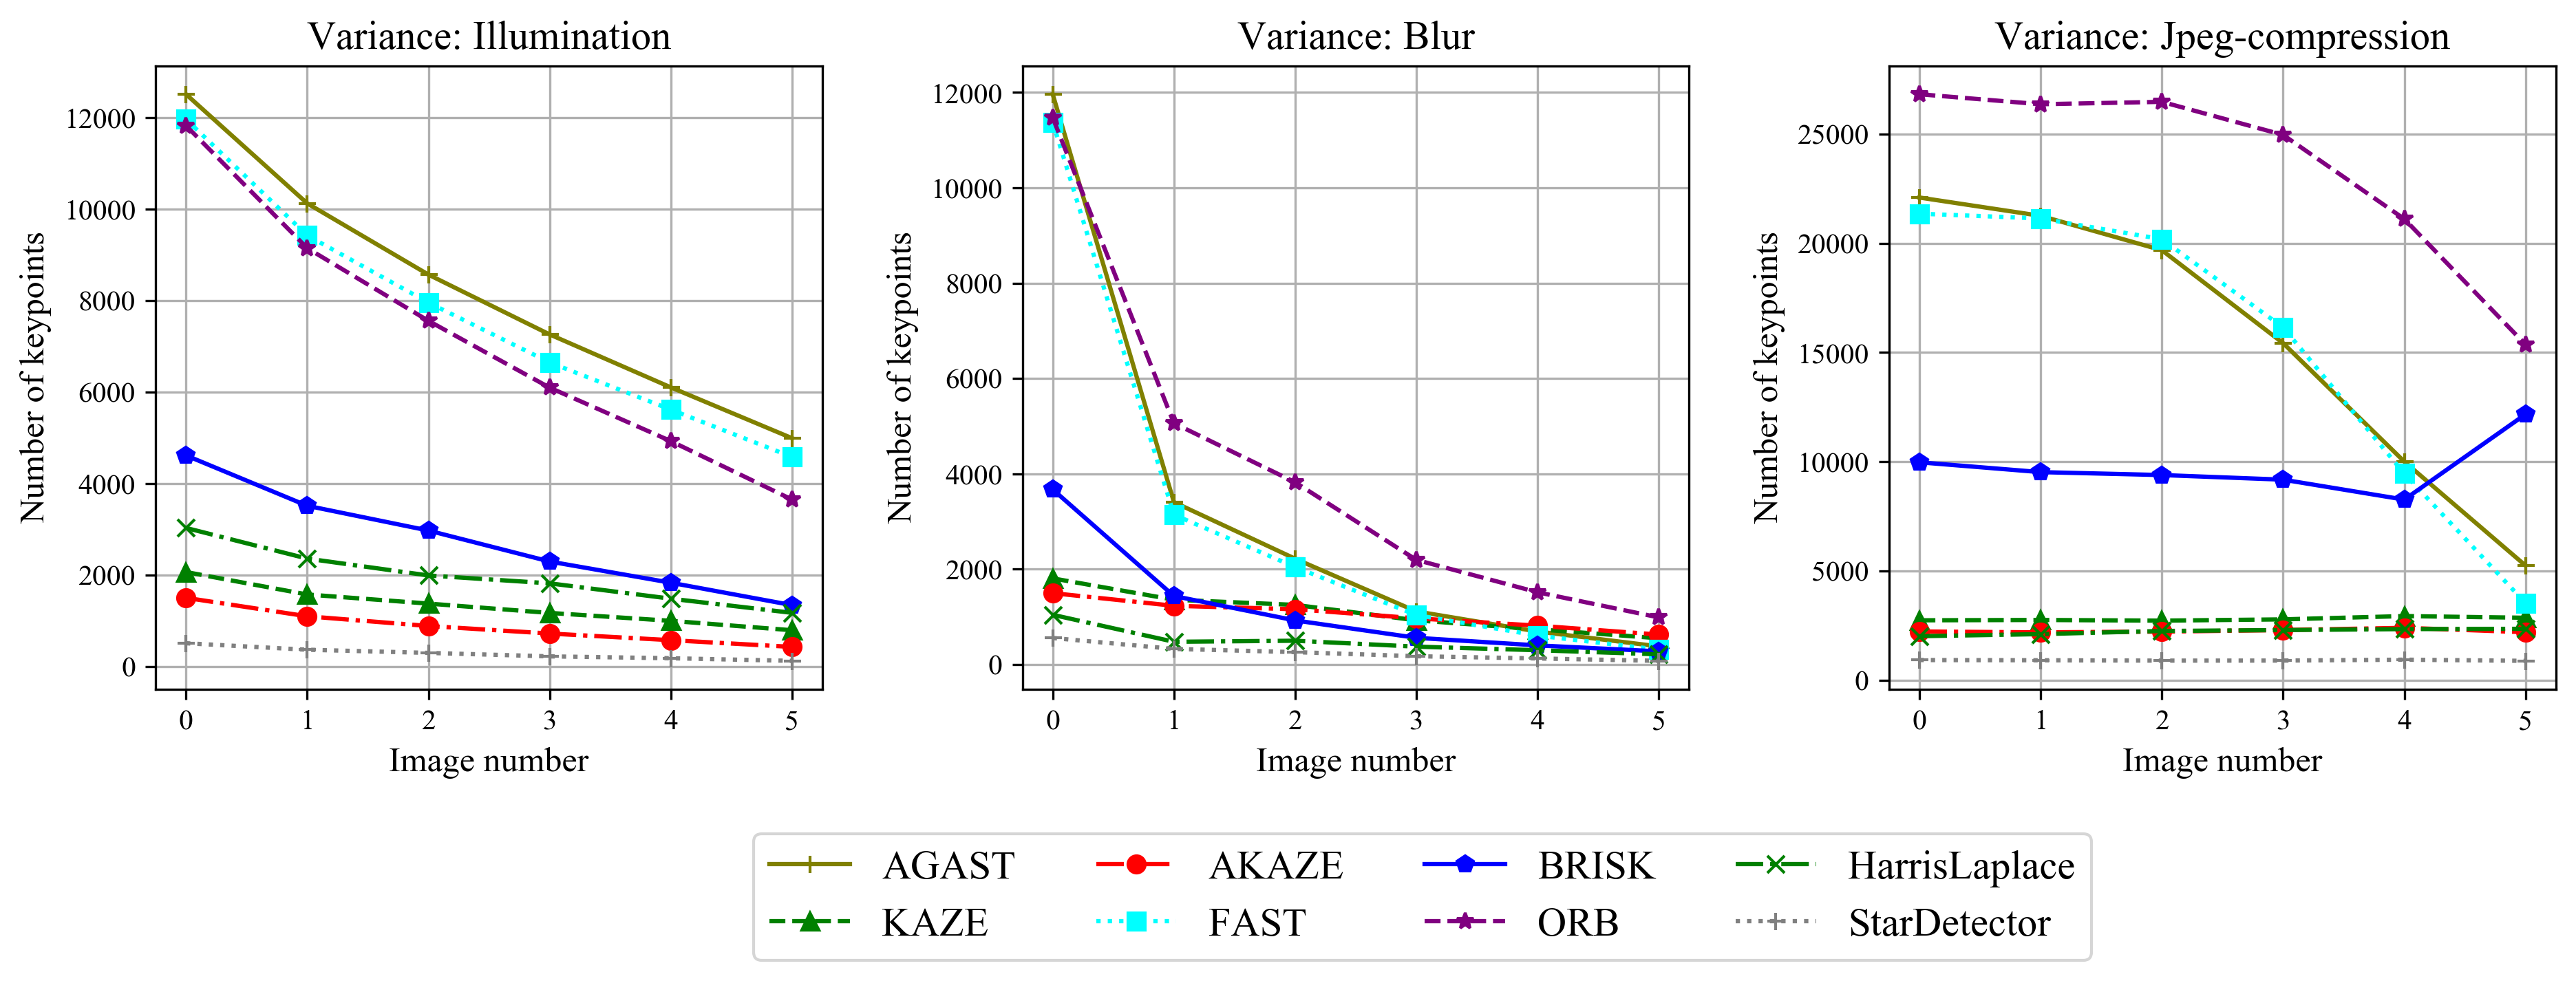

In [17]:
# plt.style.use('classic')
# fig1, axs1 = plt.subplots(1, 3, figsize=(18,5), dpi=300)
plt.style.use('seaborn-pastel')
linestyle_ = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
markers = ['+', '^', 'o', 's', 'p', '*', 'x', '+', '^', 'o', 's', 'p', '*', 'x']
fig2, axs2 = plt.subplots(1, 3, figsize=(15,4), dpi=300)
axs_col = 0
for plot_data in plot_data_arr:
    i = 0
    for detector_name in dd.all_detectors: 
        execution_time, total_keypoints = plot_data[detector_name]
#         axs1[axs_col].plot(list(execution_time.keys()), list(execution_time.values()), c=colors[i], label=detector_name)
        axs2[axs_col].plot([key for key in total_keypoints.keys()], [len(value) for value in total_keypoints.values()], 
                           linestyle=linestyle_[i], linewidth=1.5, marker=markers[i], c=colors[i], label=detector_name)
        i += 1
#     axs[0, axs_col].legend(loc="upper center",bbox_to_anchor=(0.5, -0.15), ncol=3)
    variance = image_set_variance[image_set_arr[axs_col]]
#     axs1[axs_col].set_xlabel(f'Variance: {variance}')
#     axs1[axs_col].set_ylabel("Execution Time")
    
#     axs[1, axs_col].legend(loc="upper center",bbox_to_anchor=(0.5, -0.15), ncol=3)
    axs2[axs_col].grid()
    axs2[axs_col].set_title(f'Variance: {variance.capitalize()}',fontsize=14)
    axs2[axs_col].set_xlabel(f'Image number', fontsize=12)

    axs2[axs_col].set_ylabel("Number of keypoints", fontsize=12)
    axs_col += 1
#     print(image_set_name)
# handles1, labels1 = axs1[0].get_legend_handles_labels()
handles2, labels2 = axs2[0].get_legend_handles_labels()
plt.legend(handles2, labels2, loc="upper center",bbox_to_anchor=(-0.7, -0.2), ncol = 4, fontsize=14)
fig2.subplots_adjust(wspace = 0.3)
# fig2.subplots_adjust(wspace = 0.2)
# plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()

In [19]:
change = ['Illumination', 'Scale', 'Jpeg-compression']
df_data = dict()
for j, plot_data in enumerate(plot_data_arr):
#     print(i)
    df_data[change[j]] = dict()
#     print('--------------------------------------------------')
    for key, val in plot_data.items():
         
#         print(key)
        change_rate_sum = 0
        for i in range(1, 6):
#             print(len(plot_data[key][1][i]))
            change_rate_sum += abs((len(plot_data[key][1][i]) - len(plot_data[key][1][i-1])))/len(plot_data[key][1][i-1])
        df_data[change[j]][key] = round(change_rate_sum/5, 4)
#         print(round(change_rate_sum/5, 4))
    
#     break

In [20]:
cmaps = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
cmaps2 = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']
def display_side_by_side(df, caption, cmap='Blues'):
    output = ""

    output += df.style\
                .background_gradient(cmap=cmap)\
                .set_table_styles(
                   [{
                       'selector': 'th',
                       'props': [
                           ('background-color', 'white'),
                           ('color', 'black'),
                           ('border', '1px solid black'),
                           ('text-align', 'center')
                       ]
                   },{
                       'selector': 'td',
                       'props': [
                           ('border', '1px solid black'),
                           ('text-align', 'center')
                       ]
                   },{
                       'selector': 'caption',
                       'props': [
                           ('font-size', '18px'),
                           ('color', 'Black'),
                           ('font-family',r'"Times New Roman", Times, serif'),
                           ('text-align', 'center')
                       ]
                   }])\
                .format('{:.2}')\
                .set_caption(caption)\
                ._repr_html_()
#                     .set_table_attributes("style='display:inline'")\
#     output += "\xa0\xa0\xa0\xa0"
    display(HTML(output))

In [21]:
df = pd.DataFrame(df_data)

In [23]:
from IPython.display import display, display_html, HTML
df
display_side_by_side(df, 'Average rate of change under different photometric variances',cmaps[8]+'_r')

,Illumination,Scale,Jpeg-compression
AGAST,0.17,0.48,0.23
KAZE,0.17,0.21,0.024
AKAZE,0.22,0.16,0.039
FAST,0.17,0.49,0.26
BRISK,0.22,0.39,0.13
ORB,0.21,0.38,0.1
HarrisLaplace,0.17,0.26,0.032
StarDetector,0.24,0.32,0.027


#### Gradual darkenning
__Todo__

- [ ] Change to bar plot
- [ ] Ask in stackoverflow about this checkbox problem

In [19]:
image_set_name = 'leuven'
image_set_ = util.get_image_set(data_path, image_set_name)
image_num = 4
image = image_set_['{0}_img{1}'.format(image_set_name, image_num)]
df = ex.experiment_1_df(image)
df.style. \
    apply(util.highlight_max, subset=['Execution Time', 'Number of Keypoints']). \
    apply(util.highlight_min, subset=['Execution Time', 'Number of Keypoints'])

,Detector,Execution Time,Number of Keypoints
0,AGAST,0.008607,7263
1,KAZE,0.363099,1174
2,AKAZE,0.073541,723
3,FAST,0.002267,6651
4,BRISK,0.173207,2298
5,ORB,0.008862,6100
6,HarrisLaplace,0.669582,1821
7,StarDetector,0.013742,224


#### Use set to find the intersection of the keypoints to the union

In [24]:

image_set = util.get_image_set(data_path, 'bikes')
image = image_set['bikes_img1']

execution_time, total_keypoints = kpp.get_alldet_kp_et(image)
# union_keypoints = set()
# union_keypoints.update(*total_keypoints.values())
# union_keypoints = *union_keypoints.pt
# print(len(all_keypoints))

__TODO__
- [ ] Find intersection
- [ ] Graph frequncy in seaborn
- [ ] List to numpy

In [7]:
# image_sequence = 'bikes'
# image_set = util.get_image_set(data_path, image_sequence)
# image = image_set[f'{image_sequence}_img{1}']
# kp_all = {}
# detector_name = 'GFTT'
# # fig, axs = plt.subplots(6,1, figsize=(7,21))
# sigma_range = [1,6] 
# sigma_step = 1
# def get_kpnp_frequency_det(image, detector_name, sigma_values):
#     kp_all = {}
#     for sigma in sigma_values:
#         if sigma is 0:
#             image_blur = image
#         else:
#             ksize = np.int(np.round(((((sigma - 0.8)/0.3) + 1)/0.5)+1))
#             if ksize % 2 == 0:
#                 ksize += 1
#             image_blur = cv2.GaussianBlur(image,(ksize, ksize),0)
#         kp_all[sigma] = ip.get_kp(image_blur, detector_name)   
#     kpnp_all = ip.cvkp2np_all(kp_all) 
#     kpnp_unique = ip.get_unique_kpnp(kp_all)
#     kpnp_all_frequency = ip.get_kpnp_frequency(kpnp_all, kpnp_unique)
#     return kpnp_unique, kpnp_all_frequency

# # kp_frequency.shape


Get keypoint frequency for different sigma values

In [7]:
from src import keypoint_processing as kpp

image_sequence = 'bikes'
image_set = util.get_image_set(data_path, image_sequence)
image = image_set[f'{image_sequence}_img{1}']
sigma_range = [1,6] 
sigma_step = 1
sigma_values=[1+i*sigma_step for i in range(int((sigma_range[1]-sigma_range[0])/sigma_step + 1))]
frequencies = range(1, len(sigma_values)+1)
kpnp_by_frequency_det = dict()
kpnp_total_det = dict()
for detector_name in dd.all_detectors:
    kpnp_unique, kpnp_all_frequency = kpp.get_kpnp_frequency_det_sigma(image, detector_name, sigma_values)
    kpnp_by_frequency = dict()

    for frequency in frequencies:
        kpnp_by_frequency[frequency] = kpp.get_kpnp_by_frequency(kpnp_all_frequency, kpnp_unique, frequency).shape[0]

    kpnp_by_frequency_det[detector_name] = kpnp_by_frequency
    kpnp_total_det[detector_name] = kpnp_unique.shape[0]

In [13]:
image_sequence = 'leuven'
image_set = util.get_image_set(data_path, image_sequence)
image = image_set[f'{image_sequence}_img{1}']
sigma_range = [1,3.5] 
sigma_step = 0.5
sigma_values=[1+i*sigma_step for i in range(int((sigma_range[1]-sigma_range[0])/sigma_step + 1))]
print(sigma_values)
frequencies = range(1, len(sigma_values)+1)
kpnp_by_frequency_det = dict()
kpnp_total_det = dict()
for detector_name in dd.all_detectors:
    kpnp_unique, kpnp_all_frequency = kpp.get_kpnp_frequency_det_sigma(image, detector_name, sigma_values)
    kpnp_by_frequency = dict()

    for frequency in frequencies:
        kpnp_by_frequency[frequency] = kpp.get_kpnp_by_frequency(kpnp_all_frequency, kpnp_unique, frequency).shape[0]

    kpnp_by_frequency_det[detector_name] = kpnp_by_frequency
    kpnp_total_det[detector_name] = kpnp_unique.shape[0]

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


Generate column and row data

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data = list()
data_percentage = list()
for frequency in frequencies: 
    row = list()
    row_percentage = list()
    for detector_name in kpnp_by_frequency_det.keys():
        row.append(kpnp_by_frequency_det[detector_name][frequency])
        row_percentage.append(kpnp_by_frequency_det[detector_name][frequency]/kpnp_total_det[detector_name]*100)
    data.append(row)
    data_percentage.append(row_percentage)

columns = tuple(list(kpnp_by_frequency_det.keys()))
# columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = [frequency for frequency in frequencies]
rows.reverse()


Plot number of unique keypoints by frequency

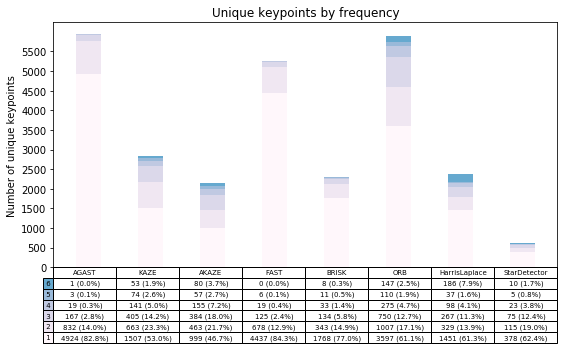

In [15]:
import numpy as np
import matplotlib.pyplot as plt

row_labels = [' '+str(row)+' ' for row in rows]
values = np.arange(0, 6000, 500)
value_increment = 1

# Get some pastel shades for the colors
colors = plt.cm.PuBuGn(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
fig, ax = plt.subplots(1, figsize=(10,5))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append([f'{kp_num} ({percentage:.1f}%)'  for kp_num, percentage in zip(data[row], data_percentage[row])])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = ax.table(cellText=cell_text,
                      rowLabels=row_labels,
                      rowLoc='left',
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom',
                      cellLoc='center')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel('Number of unique keypoints')
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Unique keypoints by frequency')

plt.show()

In [51]:
def change_brightness(img, value=50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    print(v)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
image = image_set[f'ubc_img{1}']
# print(image_set)
image = change_brightness(image, -20)
plt.imshow(image)


[[191 191 190 ... 196 195 194]
 [186 186 186 ... 192 193 194]
 [193 193 193 ... 197 198 198]
 ...
 [ 34  42  47 ...  50  77 121]
 [ 32  34  43 ...  49  62 111]
 [ 26  21  41 ...  33  50  86]]


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

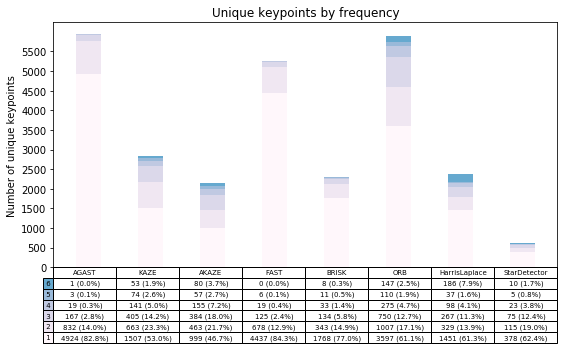

In [19]:
import numpy as np
import matplotlib.pyplot as plt

row_labels = [' '+str(row)+' ' for row in rows]
values = np.arange(0, 6000, 500)
value_increment = 1

# Get some pastel shades for the colors
colors = plt.cm.PuBuGn(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
fig, ax = plt.subplots(1, figsize=(10,5))
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append([f'{kp_num} ({percentage:.1f}%)'  for kp_num, percentage in zip(data[row], data_percentage[row])])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = ax.table(cellText=cell_text,
                      rowLabels=row_labels,
                      rowLoc='left',
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom',
                      cellLoc='center')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel('Number of unique keypoints')
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Unique keypoints by frequency')

plt.show()

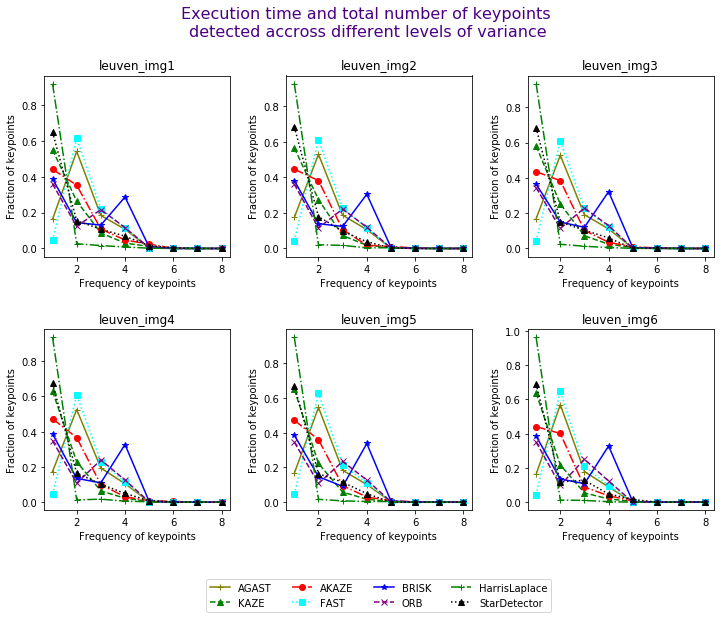

In [17]:
row = 2
col = 3
fig, axs = plt.subplots(row, col, figsize=(12,8))

frequencies = [1,2,3,4,5,6,7,8]
ex.exp_kp_freq_frac_plt('leuven', data_path, frequencies, axs, row, col)
handles, labels = axs[0, 0].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-0.8, -0.35), ncol = 4)
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()

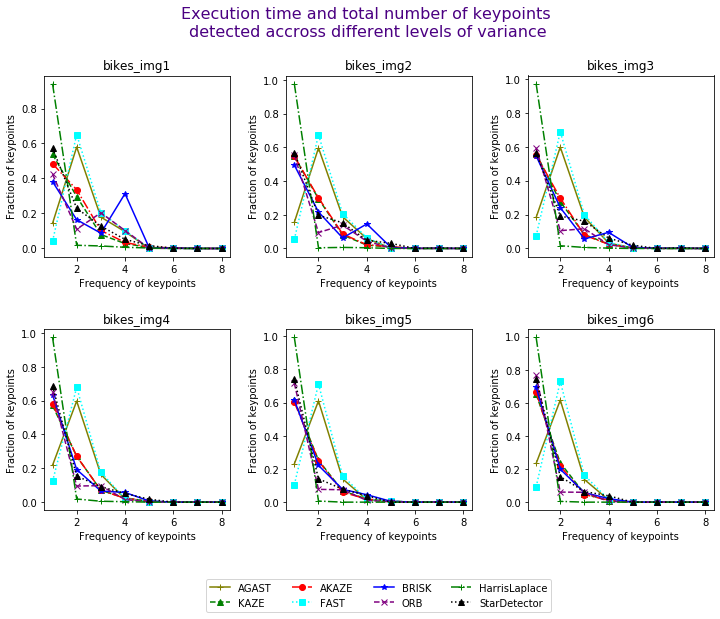

In [16]:
row = 2
col = 3
fig, axs = plt.subplots(row, col, figsize=(12,8))

frequencies = [1,2,3,4,5,6,7,8]
ex.exp_kp_freq_frac_plt('bikes', data_path, frequencies, axs, row, col)
handles, labels = axs[0, 0].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-0.8, -0.35), ncol = 4)
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()

In [ ]:
row = 2
col = 3
fig, axs = plt.subplots(row, col, figsize=(12,8))

frequencies = [1,2,3,4,5,6,7,8]
experiment_2_plt('ubc', data_path, frequencies, axs, row, col)
handles, labels = axs[0, 0].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-1.3, -0.35), ncol = 4)
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()

In [ ]:
handles, labels = axs[0, 0].get_legend_handles_labels()
plt.legend(handles, labels, loc="upper center",bbox_to_anchor=(-0.8, -0.35), ncol = 4)
fig.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.suptitle('Execution time and total number of keypoints \ndetected accross different levels of variance', fontsize = 16, y = 1.0, color='indigo')
plt.show()